<a href="https://colab.research.google.com/github/yewon91/mul_lectures/blob/main/visualization_240108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 불러오기

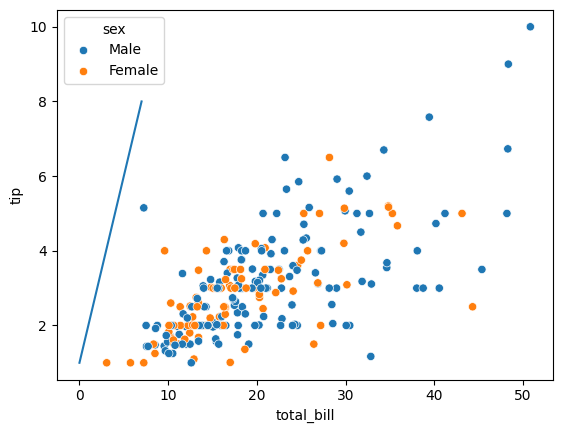

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

tips = sns.load_dataset("tips")

fig, ax = plt.subplots()

# ax 옵션 이용해 matplotlib 연동
ax.plot([1,2,3,4,5,6,7,8]) # matplotlib 시각화

# parameter = '컬럼명' # seaborn 시각화
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', ax = ax, data = tips)
plt.savefig("output/result.png")
plt.show() # 메모리 해체 => 맨마지막에 쓰면 됨

## matplotlib과 seaborn을 동시에 사용한 subplotting 기법
- 다중차트를 하나의 도화지에 담기

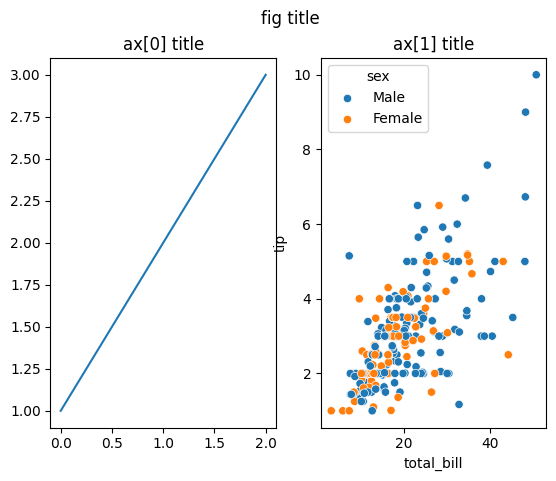

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2) # 화면분할

ax[0].set_title("ax[0] title")
ax[0].plot([1,2,3])

ax[1].set_title("ax[1] title")
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', ax = ax[1], data = tips)

# plt.title("plt.title")
fig.suptitle("fig title")
plt.show()

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


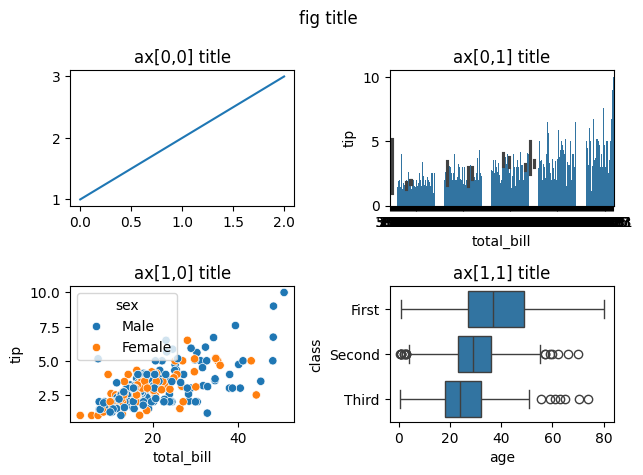

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2)

titanic = sns.load_dataset("titanic")

ax[0, 0].set_title("ax[0,0] title")
ax[0, 0].plot([1,2,3])

ax[0, 1].set_title("ax[0,1] title")
sns.barplot(x = 'total_bill', y = 'tip', ax=ax[0,1], data=tips)

ax[1, 0].set_title("ax[1,0] title")
sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex', ax = ax[1, 0], data = tips)

ax[1, 1].set_title("ax[1,1] title")
sns.boxplot(x = 'age', y = 'class', ax = ax[1, 1], data = titanic)

fig.suptitle("fig title")
plt.tight_layout() # 차트 사이 여백 주기
plt.show()

## 산점도 그래프
- x축과 y축 데이터 형태가 연속형 데이터가 와야 함
- 연속형 데이터 예시: 키, 몸무게 등 소수점이 존재하는 데이터
- 회귀선 : 관계
- 목적에 맞게 차트를 그리는게 중요!

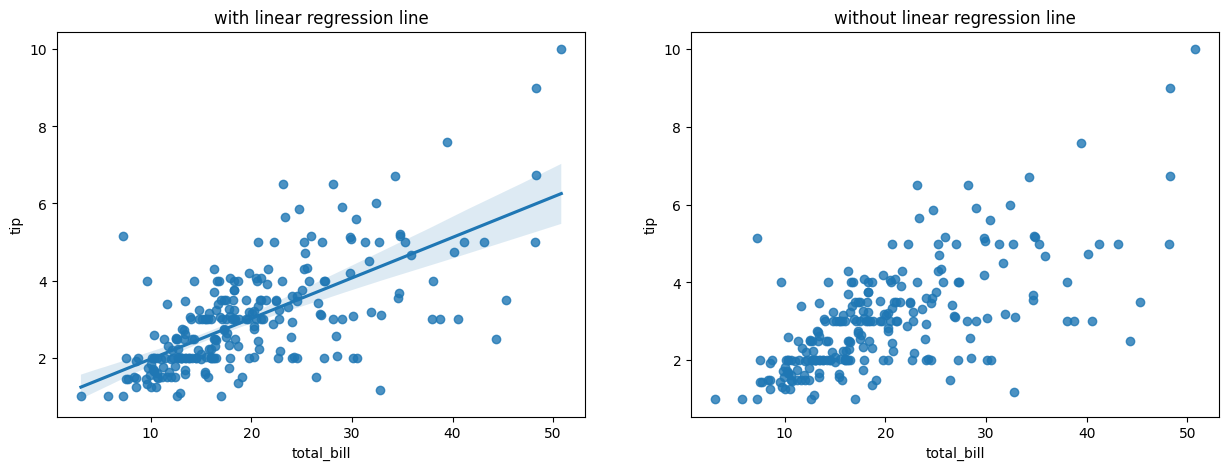

In [ ]:
fig, ax=plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[0], fit_reg=True)
ax[0].set_title('with linear regression line')

sns.regplot(x="total_bill", y="tip", data=tips, ax=ax[1], fit_reg=False)
ax[1].set_title('without linear regression line')

plt.show()

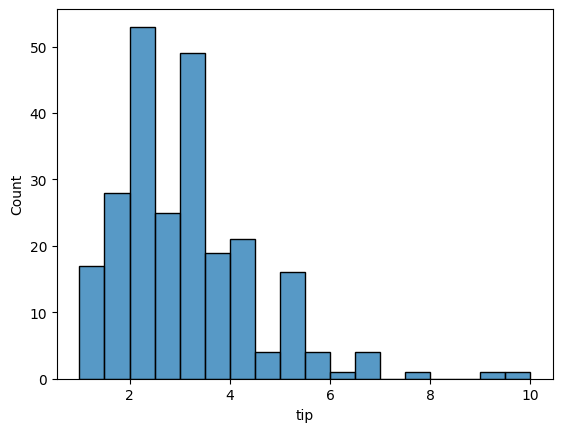

In [ ]:
fig, ax = plt.subplots()
# sns.displot(x='tip', ax=ax, data=tips) # 경고메시지만 확인, ax 미존재
sns.histplot(x='tip', ax=ax, data=tips)
plt.show()

## 박스플롯
- 이상치 데이터를 빠르게 확인
- 산업군마다 이상치에 대한 정의가 다르다
- Min, Max값 정의는 다를수있음

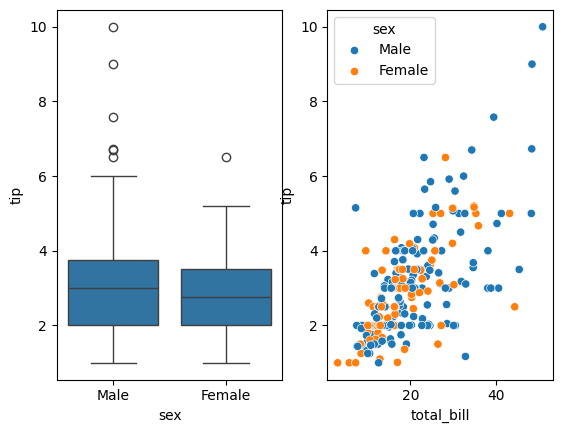

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='sex', y='tip', ax=ax[0], data=tips)
sns.scatterplot(x='total_bill', y='tip', hue="sex", ax=ax[1], data=tips)
plt.show()

C:\Users\yewon\Desktop\ProjectDS\venv\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\yewon\Desktop\ProjectDS\venv\Lib\site-packages\seaborn\categorical.py:3398: UserWarning: 17.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


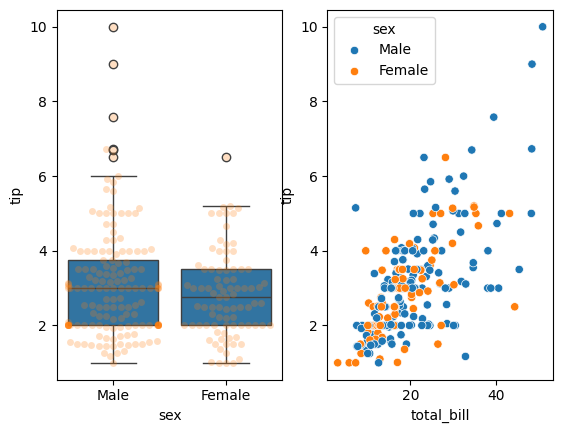

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.boxplot(x='sex', y='tip', ax=ax[0], data=tips)
sns.swarmplot(x='sex', y='tip', ax=ax[0], data=tips, alpha=0.25)
sns.scatterplot(x='total_bill', y='tip', hue="sex", ax=ax[1], data=tips)
plt.show()

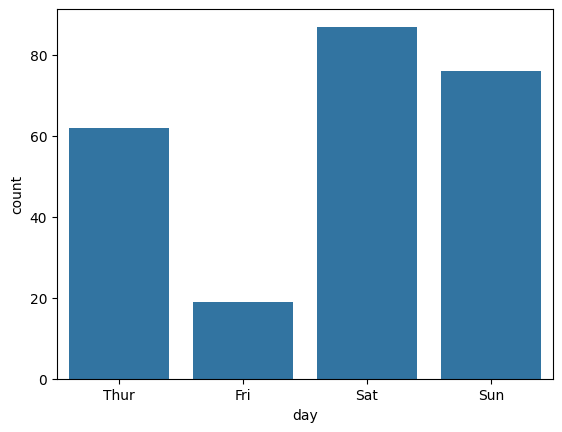

In [ ]:
sns.countplot(x='day', data=tips)
plt.show()

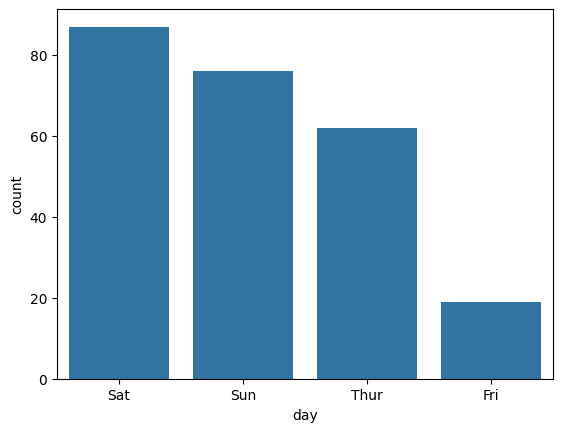

In [ ]:
sns.countplot(x='day', data=tips, order=tips['day'].value_counts().index)
plt.show()

## 시각화 중급 레벨

### 라이브러리 가져오기

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter) # 축 설정할 때 값
import seaborn as sns
import numpy as np

### 데이터 불러오기

In [ ]:
tips = sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
# y축 설정할때, 값을 소수점 2자리까지 표현
def major_formatter(x, pos):
    return "%.2f$" % x
formatter = FuncFormatter(major_formatter)

### 객체 지향 선언

C:\Users\yewon\AppData\Local\Temp\ipykernel_64084\318091569.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
C:\Users\yewon\AppData\Local\Temp\ipykernel_64084\318091569.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2) # 해당되는 결과값의 MAX값을 하나 가져옴
C:\Users\yewon\AppData\Local\Temp\ipykernel_64084\318091569.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels(['Thursday', 'Friday', 'Sat

<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
<class 'matplotlib.patches.Rectangle'>
Text(0, 0, 'Thur')
Text(1, 0, 'Fri')
Text(2, 0, 'Sat')
Text(3, 0, 'Sun')


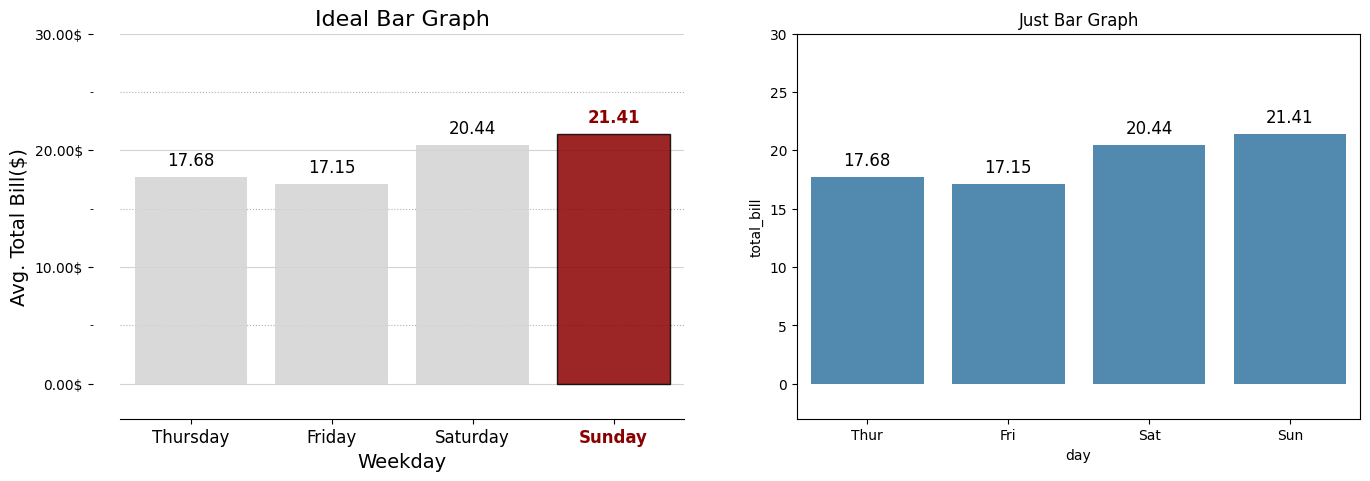

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# 이상적인 막대 그래프
ax0 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, color='lightgray', zorder=2, alpha=0.85,
                  ax=ax[0])

group_mean = tips.groupby(['day'])['total_bill'].agg('mean')
# print(group_mean)
h_day = group_mean.sort_values(ascending=False).index[0] # 해당되는 결과값의 MAX값의 인덱스 요일을 하나 가져옴
h_mean = np.round(group_mean.sort_values(ascending=False)[0], 2) # 해당되는 결과값의 MAX값을 하나 가져옴
for p in ax0.patches:
  print(type(p))
  fontweight = "normal"
  color = "k"
  height = np.round(p.get_height(), 2)
  if h_mean == height:
    fontweight="bold"
    color="darkred"
    p.set_facecolor(color)
    p.set_edgecolor("black")
  ax0.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center',
           size=12,
           fontweight=fontweight, color=color)

# y축 범위지정 옵션
ax0.set_ylim(-3, 30)
ax0.set_title("Ideal Bar Graph", size = 16)

#가로세로 축, 일부 수정및 변경
ax0.spines['top'].set_visible(False)
ax0.spines['left'].set_position(("outward", 20))
ax0.spines['left'].set_visible(False)
ax0.spines['right'].set_visible(False)

# y축 값 변경
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax0.yaxis.set_major_formatter(formatter)
ax0.yaxis.set_minor_locator(MultipleLocator(5))

# y축 라벨 변경
ax0.set_ylabel("Avg. Total Bill($)", fontsize=14)

# y축 Grid 라인 수정
ax0.grid(axis="y", which="major", color="lightgray")
ax0.grid(axis="y", which="minor", ls=":")

# x축의 값을 변경
ax0.set_xlabel("Weekday", fontsize=14)
for xtick in ax0.get_xticklabels():
  print(xtick)
  if xtick.get_text() == h_day:
    xtick.set_color("darkred")
    xtick.set_fontweight("demibold")
ax0.set_xticklabels(['Thursday', 'Friday', 'Saturday', 'Sunday'], size=12)

# 그냥 일반 막대 그래프
ax1 = sns.barplot(x = "day", y = 'total_bill', data = tips,
                  errorbar=None, alpha=0.85,
                  ax=ax[1])
for p in ax1.patches:
  height = np.round(p.get_height(), 2)
  ax1.text(p.get_x() + p.get_width()/2., height+1, height, ha = 'center', size=12)
ax1.set_ylim(-3, 30)
ax1.set_title("Just Bar Graph")
plt.show()

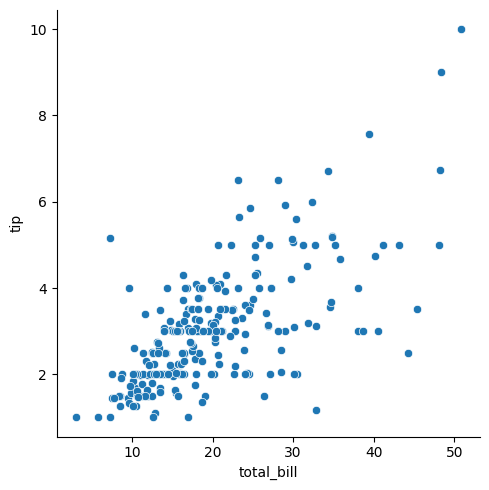

In [ ]:
tips = sns.load_dataset("tips")
sns.relplot(data=tips, x="total_bill", y="tip")

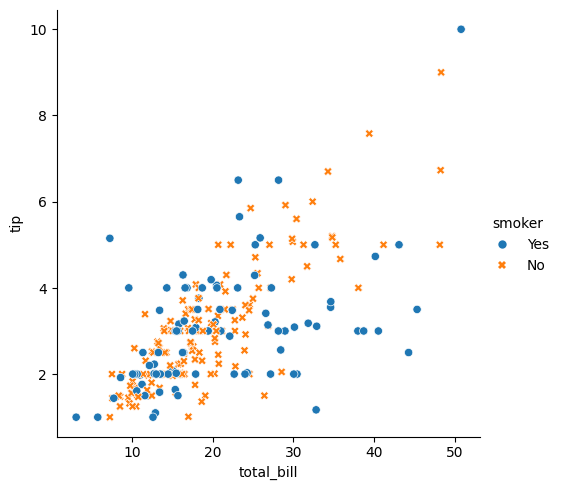

In [ ]:
sns.relplot(
    data=tips,
    x="total_bill", y="tip", hue="smoker", style="smoker"
)

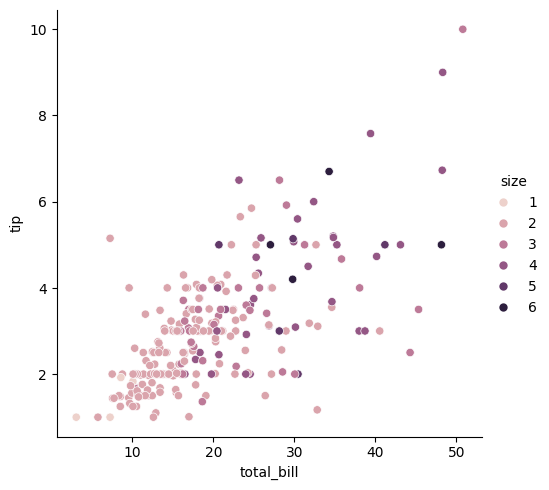

In [ ]:
sns.relplot(
    data=tips, x="total_bill", y="tip", hue="size",
)

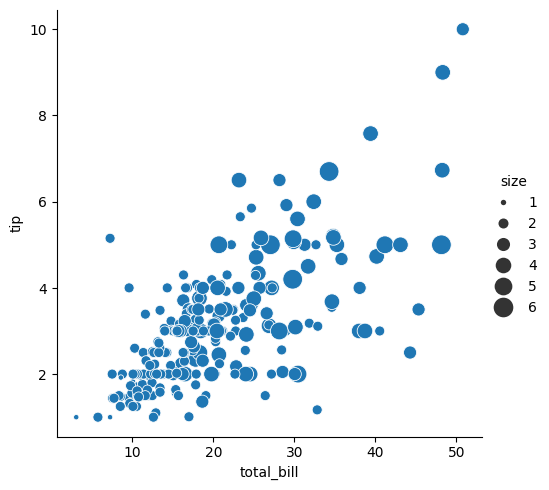

In [ ]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    size="size", sizes=(15, 200)
)

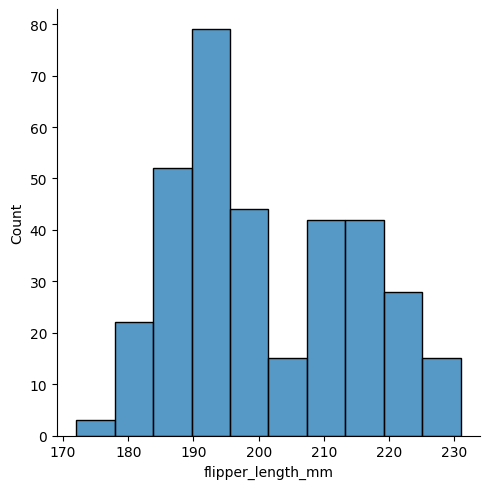

In [ ]:
penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

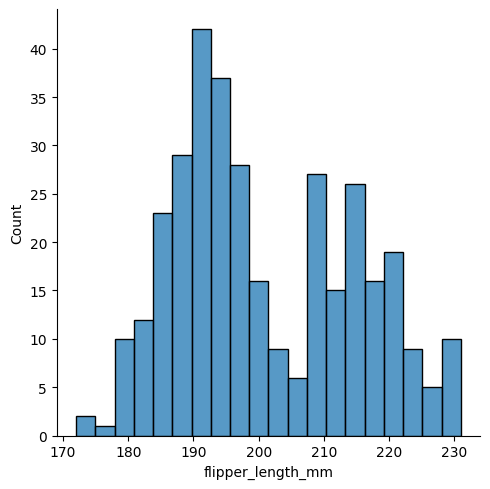

In [ ]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

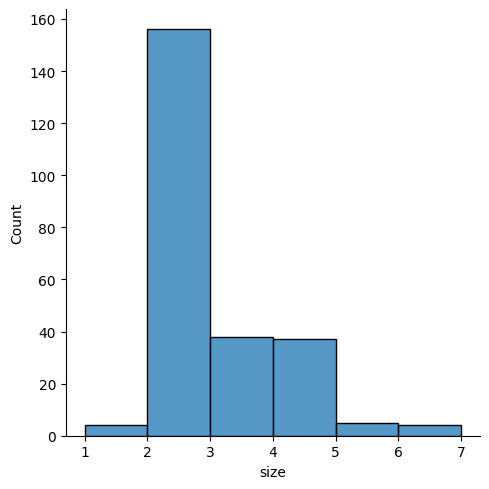

In [ ]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

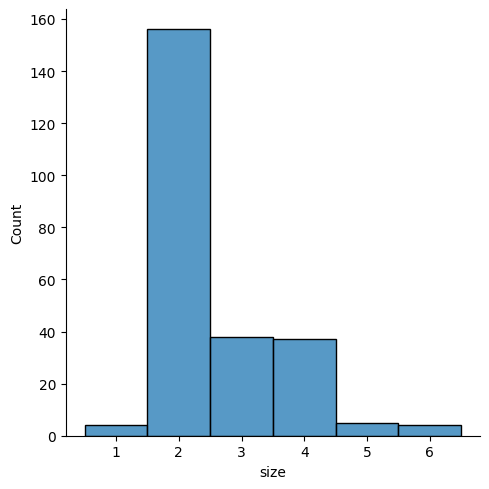

In [ ]:
sns.displot(tips, x="size", discrete=True)